In [1]:
!pip install keras-core --upgrade
!pip install -q keras-nlp --upgrade

In [2]:
!pip install tensorflow

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import keras_core as keras
import keras_nlp
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend


# Data Preprocessing:

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
df_train.shape

(7613, 5)

In [6]:
df_test.shape

(3263, 4)

In [7]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
df_test.isnull().sum()


id             0
keyword       26
location    1105
text           0
dtype: int64

In [9]:
drop_columns = ['keyword', 'location']
df_train.drop(columns=drop_columns, inplace=True)
df_train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

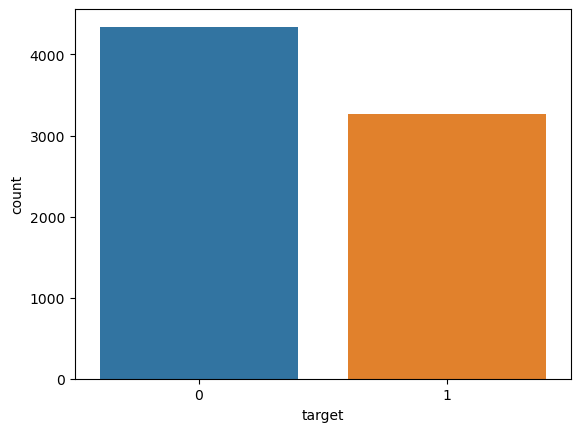

In [11]:
sns.countplot(x=df_train['target'])

In [12]:
import re

def preprocess_text(paragraph):
    # Remove references like [1], [2], etc.
    text = re.sub(r'\[[0-9]*\]', ' ', paragraph)
    # Remove URLs starting with http or https
    text = re.sub(r'http\S+|https\S+', '', text)
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hash symbols
    text = re.sub(r'#', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove leading and trailing spaces
    return text.strip()

# Apply the function to all rows in the 'text' column
df_train['text'] = df_train['text'].apply(preprocess_text)
df_test['text']=df_test['text'].apply(preprocess_text)

In [13]:
df_train.head()

,id,text,target
0,1,our deeds are the reason of this earthquake ma...,1
1,4,forest fire near la ronge sask. canada,1
2,5,all residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive wildfires evacuation ord...",1
4,7,just got sent this photo from ruby alaska as s...,1


In [16]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 960.0 kB/s eta 0:00:14
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.2/12.8 MB 1.4 MB/s eta 0:00:09
     - -------------------------------------- 0.4/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 1.6 MB/s eta 0:00:08
     -- ------------------------------------- 0.6/12.8 MB 2.0 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/12.8 MB 3.1 MB/s eta 0:00:04
     ----- ---------------------------------- 1.8/12.8 MB 4.1 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.8 MB 5.0 MB/s eta 0:00:03
     ---------- ----------------------------- 3.3/12.8 MB 5.6 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 5.4 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.8 MB 

In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess_texts(text):
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [15]:
df_train['preprocess_text']=df_train.text.apply(preprocess_texts)

In [16]:
df_test['preprocess_text']=df_test.text.apply(preprocess_texts)

In [17]:
df_train

,id,text,target,preprocess_text
0,1,our deeds are the reason of this earthquake ma...,1,deed reason earthquake allah forgive
1,4,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada
2,5,all residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,"13,000 people receive wildfires evacuation ord...",1,"13,000 people receive wildfire evacuation orde..."
4,7,just got sent this photo from ruby alaska as s...,1,get send photo ruby alaska smoke wildfires pou...
...,...,...,...,...
7608,10869,two giant cranes holding a bridge collapse int...,1,giant crane hold bridge collapse nearby home
7609,10870,the out of control wild fires in california ev...,1,control wild fire california northern state tr...
7610,10871,m1.94 [01:04 utc]?5km s of volcano hawaii.,1,m1.94 01:04 utc]?5 km s volcano hawaii
7611,10872,police investigating after an e-bike collided ...,1,police investigate e bike collide car little p...


# Feature Extraction:

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf_train = tfidf_vectorizer.fit_transform(df_train['preprocess_text'])
X_tfidf_test = tfidf_vectorizer.transform(df_test['preprocess_text'])

df_train['tweet_length'] = df_train['text'].apply(len)
df_test['tweet_length'] = df_test['text'].apply(len)

def count_keywords(text, keywords):
    count = 0
    for keyword in keywords:
        count += text.lower().split().count(keyword)
    return count

keywords = ['disaster', 'emergency', 'help', 'crisis']
df_train['keyword_count'] = df_train['text'].apply(lambda x: count_keywords(x, keywords))
df_test['keyword_count'] = df_test['text'].apply(lambda x: count_keywords(x, keywords))


In [19]:
import scipy.sparse as sp

X_train_combined = sp.hstack((X_tfidf_train, 
                              np.array(df_train['tweet_length']).reshape(-1, 1), 
                              np.array(df_train['keyword_count']).reshape(-1, 1)))
X_test_combined = sp.hstack((X_tfidf_test, 
                             np.array(df_test['tweet_length']).reshape(-1, 1), 
                             np.array(df_test['keyword_count']).reshape(-1, 1)))

y_train = df_train['target']

In [20]:
print(X_train_combined.shape)
print(y_train.shape)

(7613, 5002)
(7613,)


# Model Training and Selection and Evaluation:

In [21]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import re
import spacy

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, X_test_combined.shape)

(6090, 5002) (1523, 5002) (3263, 5002)


In [23]:
# Function to evaluate models

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.show()

Naive Bayes:
Accuracy: 0.7839789888378201
Precision: 0.82
Recall: 0.6317411402157165
F1-Score: 0.7136640557006092
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       874
           1       0.82      0.63      0.71       649

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.77      1523
weighted avg       0.79      0.78      0.78      1523



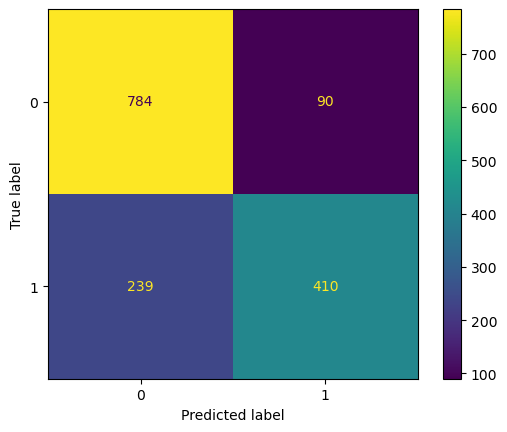

In [24]:
# 1. Naive Bayes
print("Naive Bayes:")
nb_model = MultinomialNB()
evaluate_model(nb_model, X_train, y_train, X_test, y_test)

Logistic Regression:
Accuracy: 0.7957977675640184
Precision: 0.8061594202898551
Recall: 0.6856702619414484
F1-Score: 0.7410491257285595
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



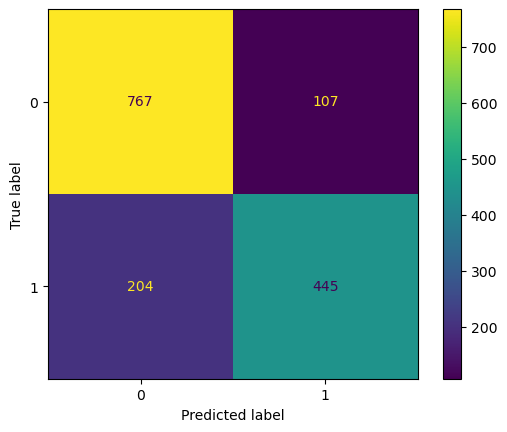

In [25]:
 #2. Logistic Regression
print("Logistic Regression:")
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Support Vector Machine:


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\m

Accuracy: 0.5738673670387393
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.42      1523



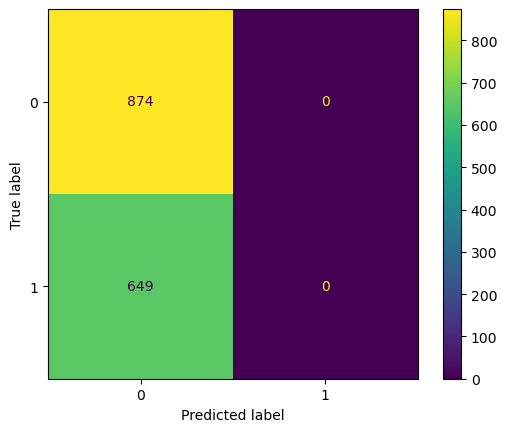

In [26]:
# 3. Support Vector Machine
print("Support Vector Machine:")
svm_model = SVC()
evaluate_model(svm_model, X_train, y_train, X_test, y_test)

Neural Network:


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5035 - loss: 0.8489 - val_accuracy: 0.5739 - val_loss: 0.6897
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5577 - loss: 0.6928 - val_accuracy: 0.5739 - val_loss: 0.6832
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5786 - loss: 0.6811 - val_accuracy: 0.6691 - val_loss: 0.6574
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6027 - loss: 0.6648 - val_accuracy: 0.7636 - val_loss: 0.5948
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7209 - loss: 0.5753 - val_accuracy: 0.7978 - val_loss: 0.4743
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8028 - loss: 0.4513 - val_accuracy: 0.7945 - val_loss: 0.4562
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8133 - loss: 0.4382 - val_accuracy: 0.7932 - val_loss: 0.4562
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8214 - loss: 0.4060 - val_accu

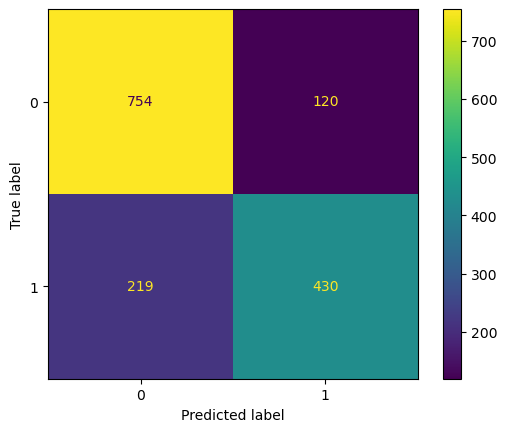

In [27]:

# 4. Neural Network
print("Neural Network:")
def build_nn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = build_nn_model(X_train.shape[1])
nn_model.fit(X_train.toarray(), y_train, epochs=20, batch_size=32, validation_data=(X_test.toarray(), y_test))
nn_val_pred = (nn_model.predict(X_test.toarray()) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, nn_val_pred)
precision = precision_score(y_test, nn_val_pred)
recall = recall_score(y_test, nn_val_pred)
f1 = f1_score(y_test, nn_val_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(classification_report(y_test, nn_val_pred))

cm = confusion_matrix(y_test, nn_val_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

Cross-Validation for Logistic Regression:
Best Parameters: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.7971109652002626
Precision: 0.8090909090909091
Recall: 0.6856702619414484
F1-Score: 0.7422852376980817
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



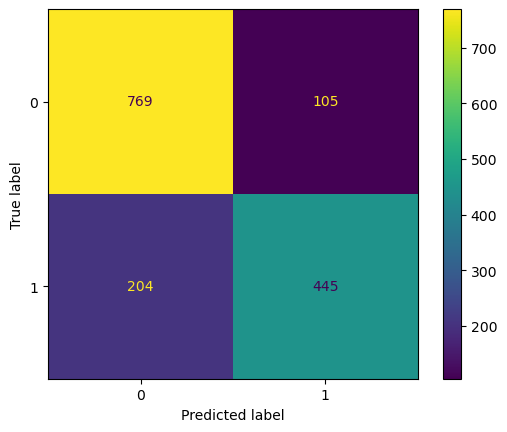

In [28]:
print("Cross-Validation for Logistic Regression:")
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_lr.fit(X_train, y_train)
print(f"Best Parameters: {grid_lr.best_params_}")
evaluate_model(grid_lr.best_estimator_, X_train, y_train, X_test, y_test)

# Interpretation and Application:

In [38]:
!pip install tweepy

  Obtaining dependency information for tweepy from https://files.pythonhosted.org/packages/4d/78/ba0065d5636bbf4a35b78c4f81b74e7858b609cdf69e629d6da5c91b9d92/tweepy-4.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for oauthlib<4,>=3.2.0 from https://files.pythonhosted.org/packages/7e/80/cab10959dc1faead58dc8384a781dfbf93cb4d33d50988f7a69f1b7c9bbe/oauthlib-3.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for requests-oauthlib<2,>=1.2.0 from https://files.pythonhosted.org/packages/6f/bb/5deac77a9af870143c684ab46a7934038a53eb4aa975bc0687ed6ca2c610/requests_oauthlib-1.3.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.5 kB 1.4 MB/s eta 0:00:01
   ------------------------------------- -- 92.2/98.5 kB 880.9 kB/s eta 0:00:01
   ---------------------------------------- 98.5/98.5 kB 809.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15

Accuracy: 0.7971109652002626
Precision: 0.8090909090909091
Recall: 0.6856702619414484
F1-Score: 0.7422852376980817
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



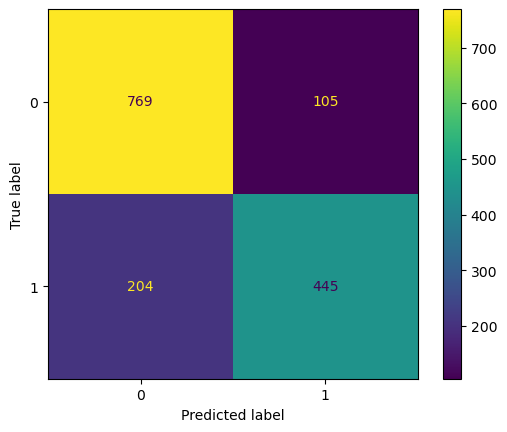

In [32]:
best_model = grid_lr.best_estimator_
evaluate_model(best_model, X_train, y_train, X_test, y_test)

In [33]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [34]:
import tweepy
import joblib

# Load the trained model
model = joblib.load('best_model.pkl')

In [35]:
model

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

1. Model Application in Disaster Response and Emergency Management

The chosen model can be leveraged in several ways to enhance disaster response and emergency management:

a. Real-Time Monitoring

Integration with Social Media Platforms: By integrating the model with social media platforms like Twitter, it can monitor and classify tweets in real-time. This enables authorities to quickly identify and respond to disaster-related information.

Automated Alerts: When a significant number of disaster-related tweets are detected from a specific region, automated alerts can be sent to emergency services and relevant authorities.

b. Information Dissemination

Public Awareness: The model can be used to filter and amplify important information about ongoing disasters, such as safety instructions, shelter locations, and resource availability.

Misinformation Management: By identifying and categorizing tweets, the model can help manage the spread of misinformation during disasters by flagging and addressing potentially harmful content.

c. Resource Allocation

Prioritizing Resources: By analyzing the volume and nature of disaster-related tweets, emergency management agencies can prioritize resource allocation to the most affected areas.

Volunteering and Aid: The model can help coordinate volunteer efforts and direct aid to the locations most in need, as indicated by social media activity.

2. Exploring Real-Time Disaster Monitoring and Information Dissemination

a. Technical Integration

API Usage: Utilize APIs (like Twitter API) to stream tweets in real-time. The model can process these tweets to classify them as disaster-related or not.

Scalability: Ensure the system is scalable to handle large volumes of data, especially during major disasters.

b. User Interfaces

Dashboards: Develop dashboards for emergency management personnel that display real-time data and analytics on disaster-related social media activity.

Mobile Applications: Create mobile apps for the public that provide real-time updates and allow users to report emergencies.

c. Ethical Considerations

Privacy: Ensure the system complies with privacy laws and regulations by anonymizing data where necessary.

Bias: Continuously monitor and improve the model to mitigate any biases that could affect the accuracy and fairness of the predictions.